# Dataset 1 Analysis and Experimants

In [1]:
import warnings
warnings.filterwarnings("ignore") # because warnings are annoying

### Importing the Data

In [2]:
import os
import cv2
import pandas as pd
import numpy as np

train_images_normal_folder = 'dataset1/train/normal'
train_images_pnuemonia_folder = 'dataset1/train/opacity'
test_images_normal_folder = 'dataset1/test/normal'
test_images_pnuemonia_folder = 'dataset1/test/opacity'

# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
# function from @derricw, May 2015
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), 0) # adding 0 makes the images grey scale
        img = cv2.resize(img, (50, 50), interpolation= cv2.INTER_LINEAR)
        img = np.hstack(img)
        if img is not None:
            images.append(img)
    return images

colnames = list(range(2500))
train_images_normal = load_images_from_folder(train_images_normal_folder)
train_images_normal_data = pd.DataFrame(train_images_normal, columns=colnames)
train_images_normal_data['Class'] = 0

train_images_pnuemonia = load_images_from_folder(train_images_pnuemonia_folder)
df = pd.DataFrame(train_images_pnuemonia, columns=colnames)
df['Class'] = 1
train_data = train_images_normal_data.append(df)

test_images_normal = load_images_from_folder(test_images_normal_folder)
test_images_normal_data = pd.DataFrame(test_images_normal, columns=colnames)
test_images_normal_data['Class'] = 0

test_images_pnuemonia = load_images_from_folder(test_images_pnuemonia_folder)
df = pd.DataFrame(test_images_pnuemonia, columns=colnames)
df['Class'] = 1
test_data = test_images_normal_data.append(df)

In [3]:
Xtrain = train_data.iloc[:,:-1].values
ytrain = train_data.iloc[:, -1].values
Xtest = test_data.iloc[:,:-1].values
ytest = test_data.iloc[:, -1].values

In [4]:
algorithms = []
accs = []

### Expeperiment 1: Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.955     0.359     0.522       234
           1      0.720     0.990     0.834       390

    accuracy                          0.753       624
   macro avg      0.837     0.674     0.678       624
weighted avg      0.808     0.753     0.717       624


Confusion Matrix:


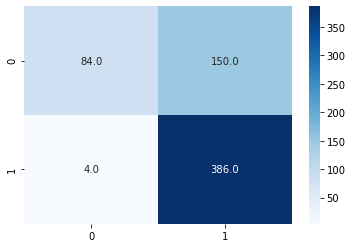

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Logistic Regression")
accs.append(ac)

### Experiment 2: Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
rng = np.random.RandomState(1)
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)

              precision    recall  f1-score   support

           0      0.750     0.167     0.273       234
           1      0.659     0.967     0.784       390

    accuracy                          0.667       624
   macro avg      0.705     0.567     0.528       624
weighted avg      0.693     0.667     0.592       624


Confusion Matrix:


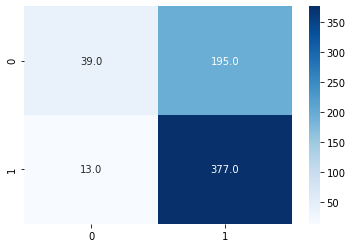

In [8]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Decision Tree")
accs.append(ac)

### Experiment 3: Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVR
rng = np.random.RandomState(1)
svr = SVR()
svr.fit(Xtrain, ytrain)
ypred = svr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.947     0.380     0.543       234
           1      0.726     0.987     0.837       390

    accuracy                          0.760       624
   macro avg      0.837     0.684     0.690       624
weighted avg      0.809     0.760     0.727       624


Confusion Matrix:


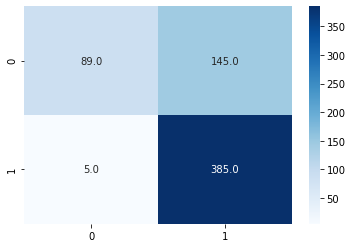

In [10]:
# ac = accuracy_score(ytest, np.round(abs(ypred)), normalize=False)
report = metrics.classification_report(ytest, np.round(abs(ypred)), digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, np.round(abs(ypred)))
ac = np.trace(cm) / np.sum(cm)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("SVM")
accs.append(ac)

### Experiment 4: Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

              precision    recall  f1-score   support

           0      0.653     0.692     0.672       234
           1      0.809     0.779     0.794       390

    accuracy                          0.747       624
   macro avg      0.731     0.736     0.733       624
weighted avg      0.750     0.747     0.748       624


Confusion Matrix:


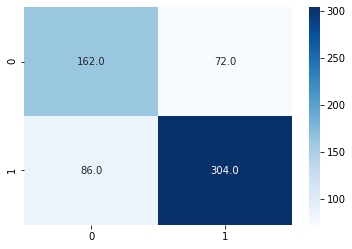

In [12]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Naive Bayes")
accs.append(ac)

### Experiment 5: K-Nearest Neighbour (kNN)

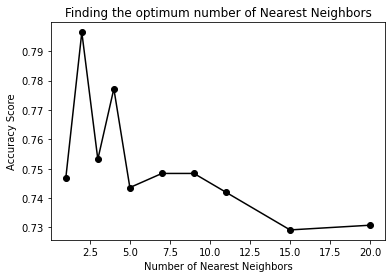

In [13]:
from sklearn.neighbors import KNeighborsClassifier
nn_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in nn_numbers:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain, ytrain)
    ypred = knn.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(nn_numbers, accuracys, '-ok')
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Nearest Neighbors")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

              precision    recall  f1-score   support

           0      0.885     0.526     0.660       234
           1      0.771     0.959     0.855       390

    accuracy                          0.796       624
   macro avg      0.828     0.742     0.757       624
weighted avg      0.814     0.796     0.782       624


Confusion Matrix:


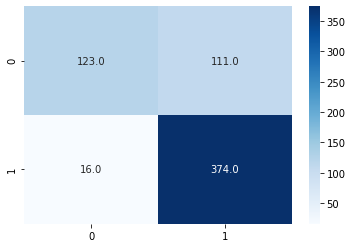

In [15]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("kNN")
accs.append(ac)

### Experiment 6: K-Means

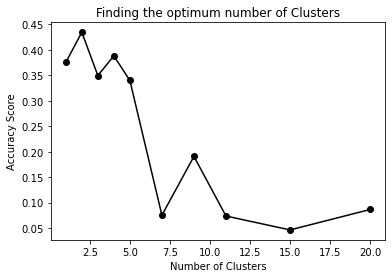

In [16]:
from sklearn.cluster import KMeans
k_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in nn_numbers:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Xtrain, ytrain)
    ypred = kmeans.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(k_numbers, accuracys, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Clusters")
plt.show()

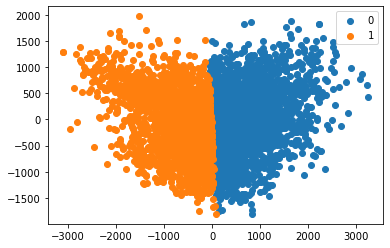

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(Xtrain)
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0      0.276     0.546     0.366      1082
           1      0.760     0.501     0.604      3110

    accuracy                          0.512      4192
   macro avg      0.518     0.523     0.485      4192
weighted avg      0.635     0.512     0.542      4192


Confusion Matrix:


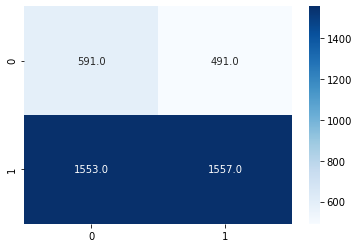

In [18]:
ypred = label
ac = accuracy_score(ytrain, ypred) 
report = metrics.classification_report(ytrain, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("K-Means")
accs.append(ac)

### Experiment 7: Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.875     0.120     0.211       234
           1      0.652     0.990     0.786       390

    accuracy                          0.663       624
   macro avg      0.764     0.555     0.498       624
weighted avg      0.736     0.663     0.570       624


Confusion Matrix:


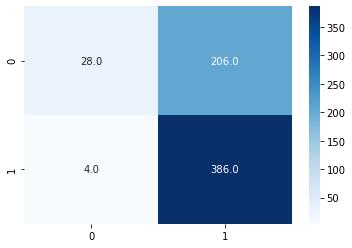

In [20]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Random Forest")
accs.append(ac)

### Experiment 8: Linear Discriminant Analysis (LDA)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.744     0.397     0.518       234
           1      0.717     0.918     0.805       390

    accuracy                          0.723       624
   macro avg      0.731     0.658     0.662       624
weighted avg      0.727     0.723     0.698       624


Confusion Matrix:


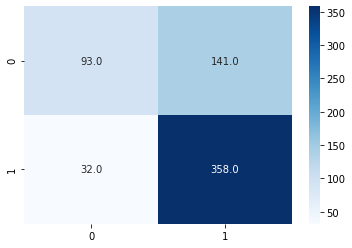

In [22]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("LDA")
accs.append(ac)

### Experiment 9: Gradient Boosting Algorithm

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.899     0.265     0.409       234
           1      0.690     0.982     0.811       390

    accuracy                          0.713       624
   macro avg      0.794     0.624     0.610       624
weighted avg      0.768     0.713     0.660       624


Confusion Matrix:


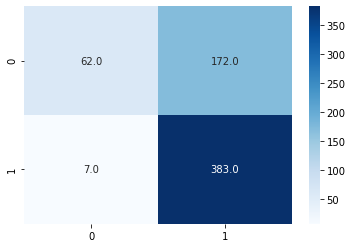

In [24]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Gradient Boosting Algorithm")
accs.append(ac)

### Experiment 10: Convolutional Neural Network (CNN)

Array dimensions before reshaping
(4192, 2500)
(624, 2500)

Array dimensions after reshaping
(4192, 50, 50)
(624, 50, 50)


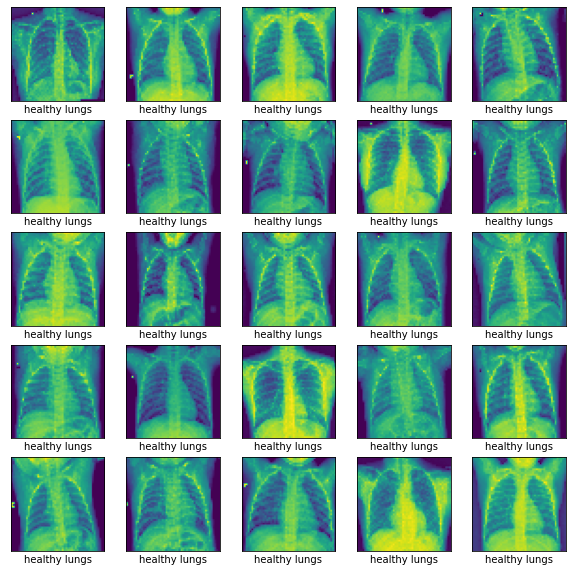

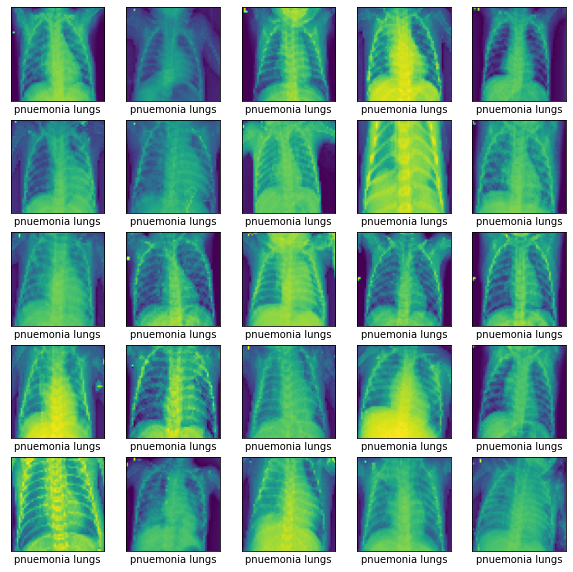

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
label_text = ["healthy lungs", "pnuemonia lungs"]
print("Array dimensions before reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
Xtrain = Xtrain.reshape(4192, 50, 50) 
Xtest = Xtest.reshape(624, 50, 50)
print()
print("Array dimensions after reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
    plt.xlabel(label_text[ytrain[i]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(25):
    index = len(Xtrain)-i-1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[index])
    plt.xlabel(label_text[ytrain[index]])
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(50, (5,5), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
Total params: 376,500
Trainable params: 376,500
Non-trai

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
 flatten (Flatten)           (None, 2500)              0

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

Epoch 1/10
131/131 [==============================] - 21s 155ms/step - loss: 1.8337 - accuracy: 0.8344 - val_loss: 0.5270 - val_accuracy: 0.7933
Epoch 2/10
131/131 [==============================] - 19s 145ms/step - loss: 0.1347 - accuracy: 0.9468 - val_loss: 0.3970 - val_accuracy: 0.8478
Epoch 3/10
131/131 [==============================] - 19s 144ms/step - loss: 0.1268 - accuracy: 0.9537 - val_loss: 0.7666 - val_accuracy: 0.7420
Epoch 4/10
131/131 [==============================] - 19s 143ms/step - loss: 0.0880 - accuracy: 0.9649 - val_loss: 0.4536 - val_accuracy: 0.8397
Epoch 5/10
131/131 [==============================] - 19s 142ms/step - loss: 0.0748 - accuracy: 0.9719 - val_loss: 0.5584 - val_accuracy: 0.8125
Epoch 6/10
131/131 [==============================] - 19s 143ms/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.8698 - val_accuracy: 0.7821
Epoch 7/10
131/131 [==============================] - 19s 145ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.9211 - val_ac

20/20 - 1s - loss: 1.5375 - accuracy: 0.7452 - 657ms/epoch - 33ms/step


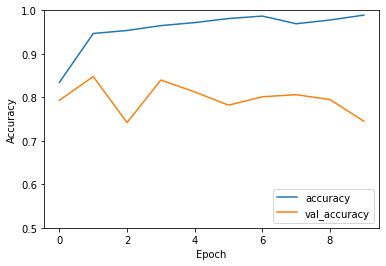

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Xtest,  ytest, verbose=2)

In [32]:
print(test_acc)
algorithms.append("CNN")
accs.append(test_acc)

0.745192289352417


### Results Analysis

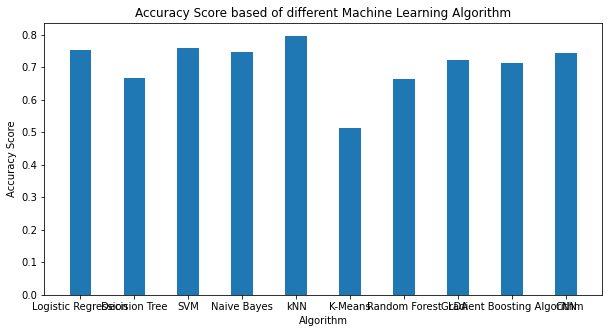

In [33]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithms, accs, width = 0.4)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score based of different Machine Learning Algorithm")
plt.show()

In [34]:
dictionary = dict(zip(algorithms, accs))
winner = max(dictionary, key=dictionary.get)
print("Highest scoring algorithm: "+str(winner))

Highest scoring algorithm: kNN
